In [1]:
# import libraries
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw

In [11]:
#read in the data
data = pd.read_csv(os.getcwd()+ "\logs\VGG11_S\Cifar10\VGG11_S_bs8_e20_id0.csv",sep= ';')

# get relevant columns
columns= []
index = data.columns
for ins in index:
    if 'train' in ins:
        if 'training' not in ins: # to be improved
            if 'classifier-6' not in ins:
                columns.append(ins)

print(columns)              


['train-saturation_classifier-2', 'train-saturation_features-0', 'train-saturation_features-11', 'train-saturation_features-15', 'train-saturation_features-18', 'train-saturation_features-22', 'train-saturation_features-25', 'train-saturation_features-4', 'train-saturation_features-8']


In [30]:



frame8 = []
frame128 = []
frame32 = []
frame512 = []

ordner= 'VGG11_S'
wort = os.getcwd()+ "\logs\\" + ordner


PATH = wort +"\Cifar10"

print(PATH)


for r, d, f in os.walk(PATH):
    for file in f:
        
        tri = []
        names = str(file)
        name = pd.read_csv(PATH +'\\' +names ,sep= ';',usecols=columns) # size geht nciht
        
        accuris = pd.read_csv(PATH +'\\' +names ,sep= ';',usecols=['test_accuracy'])
        helfer =  str(accuris.iloc[19][0])
        tri =name.mean(axis=1)
        
        tri = pd.DataFrame(data =tri)
        

        tri.rename(columns={ 0: 'Mean_Saturation'}, inplace=True)
        tri['Durchlauf'] = names + ' (Acc: ' +helfer + ')'
        tri = tri.dropna()
        tri['Epoche']= {1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20}
        

        
        if ('bs8' in names):
            frame8.append(tri)

        elif ('bs32' in names):
            frame32.append(tri)
            
        elif ('bs128' in names):
            frame128.append(tri)

        elif ('bs512' in names):

            frame512.append(tri)
        
        
        
#print(frame8)


result = pd.concat(frame512)
title  = ordner + "_bs512"

accuris
#print(accuris.iloc[19][0])

C:\Users\vivia\Documents\LocVisualisierungen\logs\VGG11_S\Cifar10


,test_accuracy
0,0.5614
1,0.6531
2,0.7232
3,0.7270
4,0.7831
5,0.7922
6,0.7775
7,0.7952
8,0.7938
9,0.8157


VGG11_S_bs512


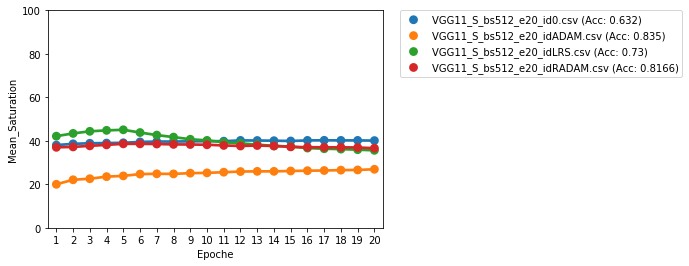

<Figure size 1800x1800 with 0 Axes>

In [39]:

print(title)
#fr = sns.scatterplot(x='Epoche', y='Mean_Saturation', hue='Durchlauf',data=result)
fr = sns.pointplot(x="Epoche", y="Mean_Saturation", hue='Durchlauf',
                    data=result)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0, 100) #fixed
plt.figure(figsize=(25,25))
plt.tight_layout()
plt.show()

#ACHTE AUF gleiche Farbe!!


fig = fr.get_figure()
#fig.savefig(title + '.png', bbox_inches='tight')


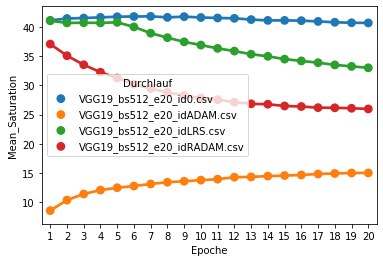

In [7]:


# #sns.pointplot(x="Epoche", y="Mean_Saturation", hue='Durchlauf',
#                     data=result)